In [ ]:
# Water Potability

# Import Libraries

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

In [3]:
data=pd.read_csv('water_potability.csv')

In [4]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


# Data Explorartion

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [7]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
# displaying null values in each data

In [8]:
import missingno as msno
import plotly.express as px

<Axes: >

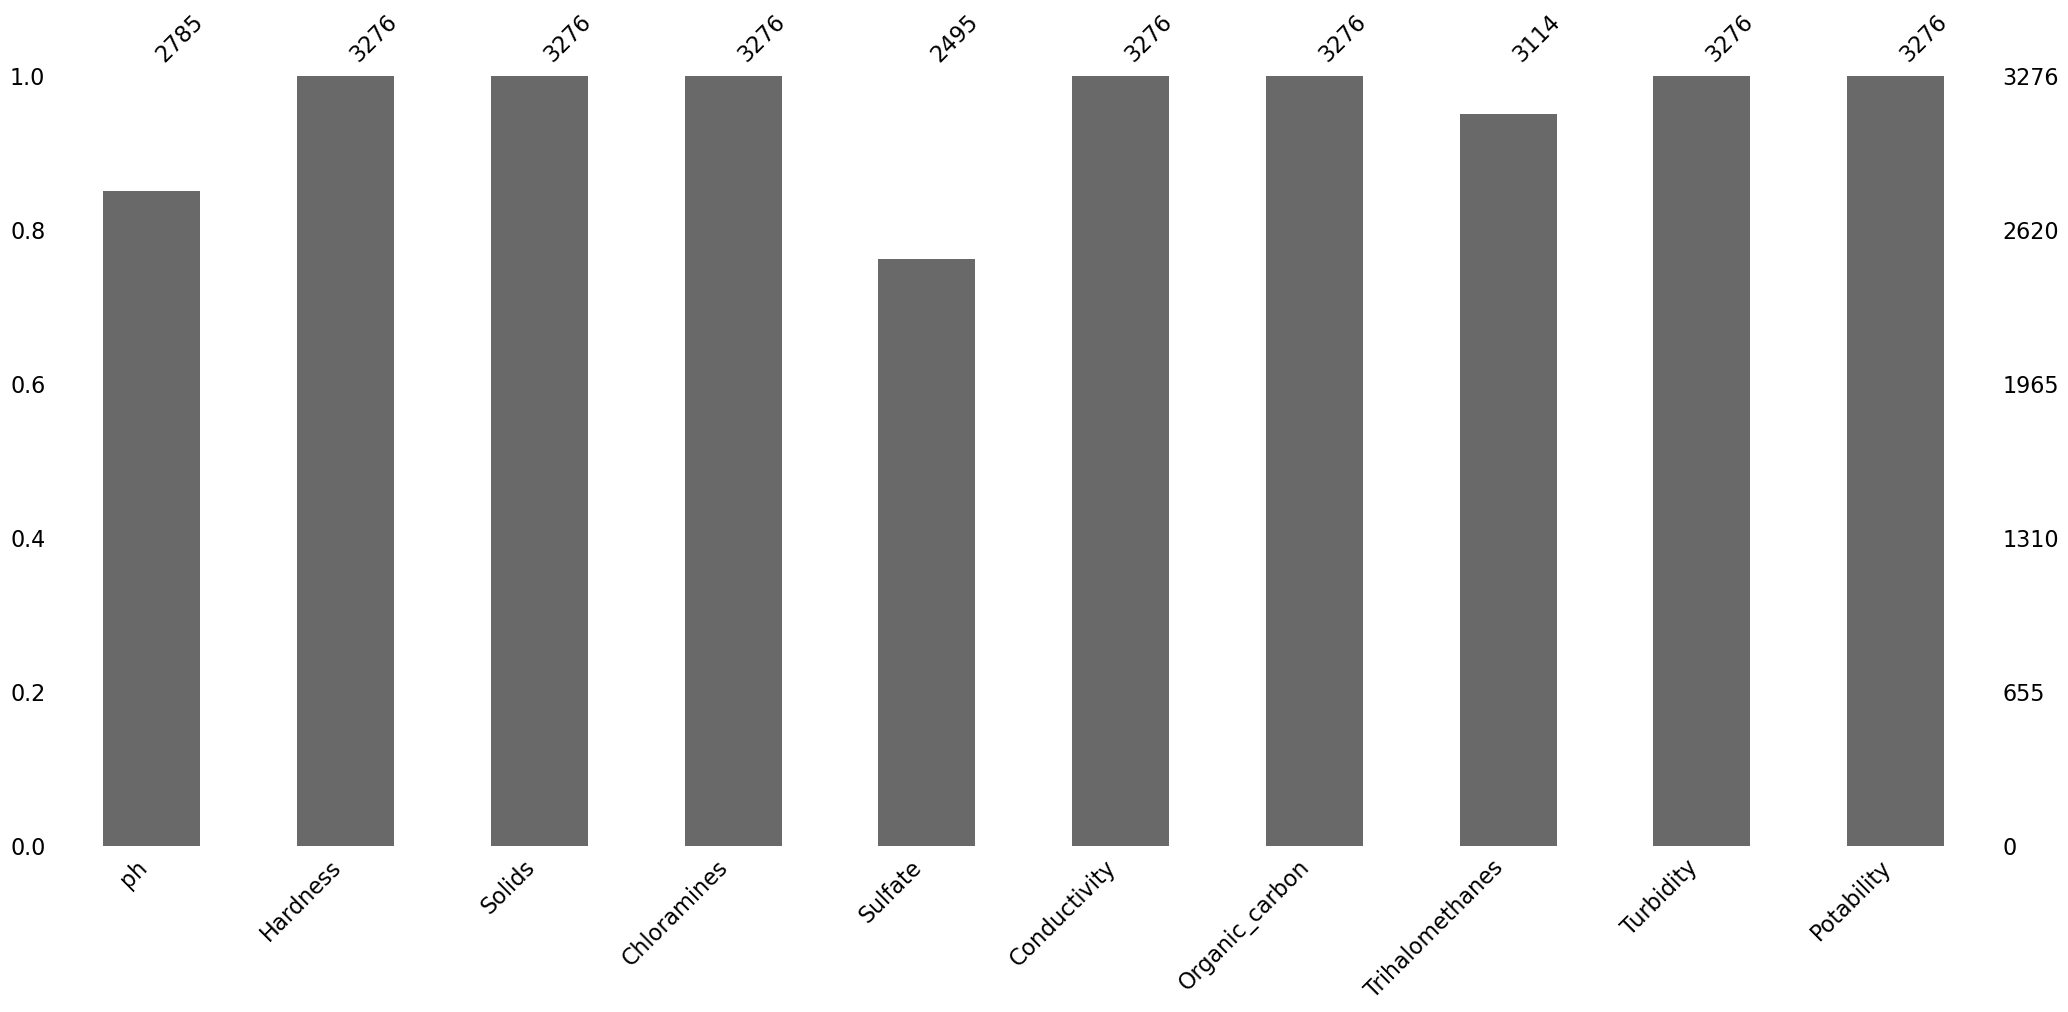

In [9]:
msno.bar(data)

In [28]:
data_null=(data.isnull().sum()/len(data))*100
data_null=data_null.to_frame()


In [29]:
data_null

,0
ph,14.987790
Hardness,0.000000
Solids,0.000000
Chloramines,0.000000
Sulfate,23.840049
Conductivity,0.000000
Organic_carbon,0.000000
Trihalomethanes,4.945055
Turbidity,0.000000
Potability,0.000000


In [ ]:
# Unique values in data

In [30]:
for i in data.columns:
    print(i,':',data[i].nunique())

ph : 2785
Hardness : 3276
Solids : 3276
Chloramines : 3276
Sulfate : 2495
Conductivity : 3276
Organic_carbon : 3276
Trihalomethanes : 3114
Turbidity : 3276
Potability : 2


# Data visualisation

In [ ]:
sns.pairplot(data)

<Axes: xlabel='Potability', ylabel='count'>

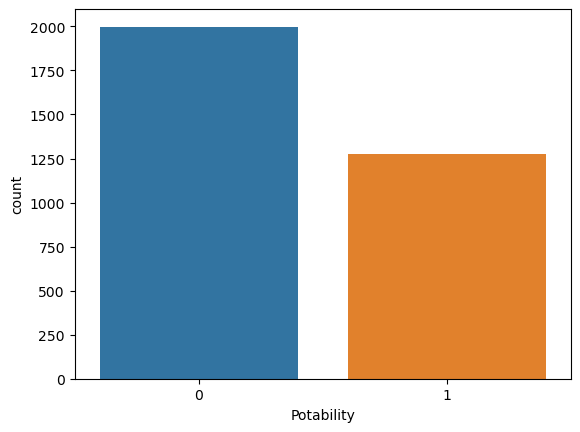

In [33]:
sns.countplot(data,x='Potability')

[]

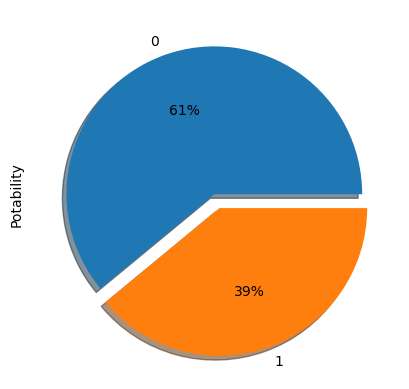

In [40]:
data['Potability'].value_counts().plot.pie(explode=(0,0.1),autopct="%.0f%%",shadow=True)
plt.plot()

* By this we can say that output value is not in equal propotional 
* imbalanced datasets, where one class significantly outnumbers the others.

In [46]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [45]:
x=data.iloc[:,:9]
x

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658


In [47]:
y=data['Potability']

# Balencing Data

### Random Oversampling and Undersampling:

1. Random Oversampling: This involves duplicating samples from the minority class to balance the class distribution. Be cautious with this approach, as it can lead to overfitting.

2. Random Undersampling: This involves randomly removing samples from the majority class to balance the class distribution. It may lead to a loss of valuable information.

### SMOTE (Synthetic Minority Over-sampling Technique):

* SMOTE generates synthetic samples for the minority class by interpolating between existing samples. It creates new data points by taking random linear combinations of the feature vectors of existing minority class samples.

# SMOTE

In [ ]:
X=x.copy()
Y=y.copy()

In [70]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [68]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658


## Filling null values

In [71]:
ph_mean=X['ph'].mean()
X['ph'].fillna(ph_mean, inplace=True)

Sulfate_mean=X['Sulfate'].mean()
X['Sulfate'].fillna(Sulfate_mean, inplace=True)

Trihalomethanes_mean=X['Trihalomethanes'].mean()
X['Trihalomethanes'].fillna(Trihalomethanes_mean, inplace=True)

In [72]:
# Using smote balencing data before splitting train and test

from imblearn.over_sampling import SMOTE
# Create a SMOTE instance
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = smote.fit_resample(X,Y)

[]

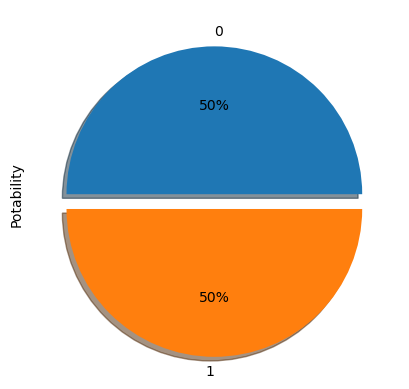

In [74]:
y_resampled.value_counts().plot.pie(explode=(0,0.1),autopct="%.0f%%",shadow=True)
plt.plot()

# If balencing data after splitting train and test 

# Splitting data

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)

In [51]:
x_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2985,NaN,188.445469,28791.614416,8.040356,382.009477,422.234861,10.575690,63.235365,3.228379
1073,7.203439,168.445358,22826.484697,6.283250,271.892045,437.370863,16.410654,64.505923,6.389161
3140,NaN,242.827588,29298.074262,5.853840,340.348645,463.115174,5.426650,NaN,3.522586
2643,6.056818,211.765886,4440.277357,9.507303,NaN,316.921776,17.766397,53.541191,3.358061
2174,9.581189,223.296216,28292.780318,5.665431,NaN,398.479317,11.350768,44.574120,3.929178
...,...,...,...,...,...,...,...,...,...
1095,4.187491,208.374188,21809.709834,5.846112,327.474203,264.508083,11.235144,46.682597,4.592959
1130,7.793915,164.958947,25506.912237,7.868036,358.259200,398.460312,15.297496,NaN,4.220028
1294,6.630364,186.761088,30939.023214,7.703481,NaN,330.876083,13.815757,86.753117,3.490588
860,8.783168,218.032840,16183.586649,7.390474,334.053885,389.021616,16.354520,47.100982,4.274137


In [52]:
x_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2947,NaN,183.521107,20461.252710,7.333212,333.119476,356.369022,20.179029,67.019903,4.886634
2782,6.643159,188.913541,32873.820022,6.791509,333.848842,336.561501,14.706810,67.844849,4.562198
1644,7.846058,224.058877,23264.109968,5.922367,300.402620,387.971336,13.406737,43.075186,2.487969
70,7.160467,183.089310,6743.346066,3.803036,277.599099,428.036344,9.799625,90.035374,3.884891
2045,6.615350,179.240661,26392.863612,9.309160,NaN,496.363562,12.786595,78.262369,4.453443
...,...,...,...,...,...,...,...,...,...
542,9.895889,210.654041,13189.519383,4.945128,NaN,481.136793,11.763453,49.851928,3.813429
3189,6.886513,211.454417,35018.325600,6.067597,NaN,549.997058,8.445127,27.663174,3.599756
1921,7.288737,233.977810,31617.075415,8.533888,331.838167,490.047095,12.225342,31.802024,3.531385
2839,7.243482,196.982379,29772.019247,6.497201,NaN,322.365237,14.154955,50.655001,4.763579


In [53]:
x_train.isnull().sum()

ph                 354
Hardness             0
Solids               0
Chloramines          0
Sulfate            562
Conductivity         0
Organic_carbon       0
Trihalomethanes    113
Turbidity            0
dtype: int64

## Filling null values of x_train

In [54]:
ph_mean=x_train['ph'].mean()
x_train['ph'].fillna(ph_mean, inplace=True)

Sulfate_mean=x_train['Sulfate'].mean()
x_train['Sulfate'].fillna(Sulfate_mean, inplace=True)

Trihalomethanes_mean=x_train['Trihalomethanes'].mean()
x_train['Trihalomethanes'].fillna(Trihalomethanes_mean, inplace=True)

In [55]:
x_train.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [56]:
x_test.isnull().sum()

ph                 137
Hardness             0
Solids               0
Chloramines          0
Sulfate            219
Conductivity         0
Organic_carbon       0
Trihalomethanes     49
Turbidity            0
dtype: int64

## Filling null values of x_train

In [57]:
ph_mean=x_test['ph'].mean()
x_test['ph'].fillna(ph_mean, inplace=True)

Sulfate_mean=x_test['Sulfate'].mean()
x_test['Sulfate'].fillna(Sulfate_mean, inplace=True)

Trihalomethanes_mean=x_test['Trihalomethanes'].mean()
x_test['Trihalomethanes'].fillna(Trihalomethanes_mean, inplace=True)

In [58]:
x_test.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [75]:
# Random Oversampling and Undersampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [76]:
# Random Oversampling
ros=RandomOverSampler(sampling_strategy='auto')
# The 'auto' strategy attempts to balance the classes evenly
x_resampled,y_resampled=ros.fit_resample(x_train,y_train)
# Random Undersampling
rus = RandomUnderSampler(sampling_strategy='auto')  # You can adjust the sampling strategy
x_resampled, y_resampled = rus.fit_resample(x_train, y_train)

[]

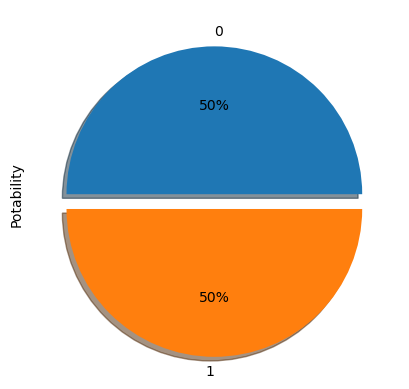

In [77]:
y_resampled.value_counts().plot.pie(explode=(0,0.1),autopct="%.0f%%",shadow=True)
plt.plot()

# scaling

In [81]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train1=scaler.fit_transform(x_train)
x_train=pd.DataFrame(x_train1,columns=x.columns)
x_test1=scaler.transform(x_test)
x_test=pd.DataFrame(x_test1,columns=x.columns)

In [82]:
x_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,6.073403e-16,-0.246998,0.750536,0.587582,1.336270e+00,-0.054682,-1.117452,-2.025150e-01,-0.938934
1,7.324236e-02,-0.856455,0.080096,-0.527665,-1.708881e+00,0.130717,0.656002,-1.224956e-01,3.126131
2,6.073403e-16,1.410171,0.807459,-0.800215,1.841954e-01,0.446057,-2.682430,-8.949963e-16,-0.560556
3,-7.108221e-01,0.463637,-1.986388,1.518663,1.571929e-15,-1.344653,1.068061,-8.130518e-01,-0.772151
4,1.699158e+00,0.814997,0.694470,-0.919799,1.571929e-15,-0.345662,-0.881878,-1.377796e+00,-0.037641
...,...,...,...,...,...,...,...,...,...
2288,-1.989076e+00,0.360283,-0.034182,-0.805120,-1.718302e-01,-1.986664,-0.917020,-1.245004e+00,0.816045
2289,4.770124e-01,-0.962696,0.381358,0.478209,6.794880e-01,-0.345895,0.317674,-8.949963e-16,0.336420
2290,-3.186289e-01,-0.298326,0.991890,0.373764,1.571929e-15,-1.173728,-0.132680,1.278627e+00,-0.601709
2291,1.153468e+00,0.654608,-0.666520,0.175097,1.012217e-02,-0.461509,0.638941,-1.218655e+00,0.406009


In [83]:
x_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-0.034968,-0.397057,-0.185740,0.138753,-0.015718,-0.861467,1.801346,0.035834,1.193739
1,-0.309880,-0.232735,1.209348,-0.205070,0.004452,-1.104088,0.138143,0.087789,0.776483
2,0.512668,0.838238,0.129282,-0.756720,-0.920459,-0.474373,-0.256996,-1.472198,-1.891173
3,0.043858,-0.410215,-1.727539,-2.101873,-1.551060,0.016379,-1.353326,1.485343,-0.094598
4,-0.328895,-0.527494,0.480933,1.392900,0.007940,0.853314,-0.445479,0.743882,0.636615
...,...,...,...,...,...,...,...,...,...
978,1.914352,0.429756,-1.003033,-1.376980,0.007940,0.666802,-0.756448,-1.045401,-0.186505
979,-0.143473,0.454146,1.450376,-0.664542,0.007940,1.510266,-1.765006,-2.442843,-0.461308
980,0.131569,1.140494,1.068099,0.900830,-0.051151,0.775944,-0.616064,-2.182179,-0.549240
981,0.100624,0.013144,0.860727,-0.391869,0.007940,-1.277977,-0.029586,-0.994823,1.035478


# Model Creating

## Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [85]:
from sklearn.metrics import accuracy_score,classification_report

In [87]:
y_pred=LR.predict(x_test)

In [89]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.6286876907426246

In [91]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       617
           1       1.00      0.00      0.01       366

    accuracy                           0.63       983
   macro avg       0.81      0.50      0.39       983
weighted avg       0.77      0.63      0.49       983



* Precision for class 0 is 0.63, meaning 63% of predictions for class 0 were correct.

* Recall for class 0 is 1.00, indicating that 100% of actual class 0 instances were correctly identified.

* The F1-score balances precision and recall, providing an overall measure of model performance.

* The support values show the distribution of actual classes in the test dataset.

* The accuracy of the model is 63%

## K-Nearest Neighbors (KNN)

In [97]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [185]:
y_pred_knn=knn.predict(x_test)

In [101]:
accuracy=accuracy_score(y_test,y_pred_knn)
accuracy

0.6520854526958291

In [102]:
report = classification_report(y_test, y_pred_knn)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.90      0.76       617
           1       0.58      0.24      0.34       366

    accuracy                           0.65       983
   macro avg       0.62      0.57      0.55       983
weighted avg       0.63      0.65      0.61       983



* Precision for class 0 is 0.67, meaning 67% of predictions for class 0 were correct.
* Precision for class 1 is 0.58, meaning 58% of predictions for class 1 were correct.


* Recall for class 0 is 0.90, indicating that 90% of actual class 0 instances were correctly identified.
* Recall for class 1 is 0.24, indicating that 24% of actual class 1 instances were correctly identified.


* The F1-score balances precision and recall, providing an overall measure of model performance.

* The support values show the distribution of actual classes in the test dataset.

* The accuracy of the model is 65%

## Decision Trees classifier

In [104]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=42)

In [105]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [106]:
y_pred_dtc=dtc.predict(x_test)

In [107]:
accuracy=accuracy_score(y_pred_dtc,y_test)

In [108]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.6500508646998983


In [109]:
report = classification_report(y_test, y_pred_dtc)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.93      0.77       617
           1       0.60      0.18      0.28       366

    accuracy                           0.65       983
   macro avg       0.63      0.56      0.52       983
weighted avg       0.63      0.65      0.59       983



* Precision for class 0 is 0.66, meaning 66% of predictions for class 0 were correct.
* Precision for class 1 is 0.60, meaning 60% of predictions for class 1 were correct.

* Recall for class 0 is 0.93, indicating that 93% of actual class 0 instances were correctly identified.
* Recall for class 1 is 0.18, indicating that 18% of actual class 1 instances were correctly identified.

* By this we can say recall of 1 is decreasing ie percent of correctly predicting actual value is 18% 
* The accuracy of the model is 65%

## Random Forest  Classifier

In [112]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=100,random_state=42)

In [113]:
RF.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [114]:
pred_rf=RF.predict(x_test)

In [119]:
accuracy=accuracy_score(pred_rf,y_test)

In [125]:
print(f"accuracy:{accuracy}")

accuracy:0.6876907426246185


In [123]:
report2 = classification_report(y_test, pred_rf)

In [124]:
print("Classification Report:")
print(report2)

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.88      0.78       617
           1       0.65      0.36      0.46       366

    accuracy                           0.69       983
   macro avg       0.67      0.62      0.62       983
weighted avg       0.68      0.69      0.66       983



* Precision for class 0 is 0.70, meaning 70% of predictions for class 0 were correct.

* Precision for class 1 is 0.65, meaning 65% of predictions for class 1 were correct.

* Recall for class 0 is 0.88, indicating that 88% of actual class 0 instances were correctly identified.

* Recall for class 1 is 0.36, indicating that 36% of actual class 1 instances were correctly identified.

* By this we can say recall of 1 is decreasing ie percent of correctly predicting actual value is 18%

* The accuracy of the model is 69%

## Naive Bayes

In [129]:
from sklearn.naive_bayes import BernoulliNB
BNB=BernoulliNB()
BNB.fit(x_train,y_train)

BernoulliNB()

In [130]:
y_pred_nb = BNB.predict(x_test)


In [133]:
accuracy1 = accuracy_score(y_test, y_pred_nb)
report3 = classification_report(y_test, y_pred_nb)


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [134]:
print(f"Accuracy: {accuracy1}")
print("Classification Report:")
print(report3)

Accuracy: 0.6276703967446592
Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       617
           1       0.00      0.00      0.00       366

    accuracy                           0.63       983
   macro avg       0.31      0.50      0.39       983
weighted avg       0.39      0.63      0.48       983



* Using Bernoulli Naive Bayes leads to decreasing accuracy

## Gradient Boosting Classifier

In [139]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier(loss='log_loss',
    learning_rate=0.1,
    n_estimators=100,random_state=42)
GBC.fit(x_train,y_train)

GradientBoostingClassifier(random_state=42)

In [140]:
pred_gbc=GBC.predict(x_test)

In [141]:
accuracy=accuracy_score(y_test,pred_gbc)

In [142]:
report = classification_report(y_test, pred_gbc)


In [143]:
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.659206510681587
Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       617
           1       1.00      0.00      0.01       366

    accuracy                           0.63       983
   macro avg       0.81      0.50      0.39       983
weighted avg       0.77      0.63      0.49       983



## Extreme Gradient Boosting (XGBoost)

In [148]:
! pip install xgboost

     -------------------------------------- 99.7/99.7 MB 341.9 kB/s eta 0:00:00


In [150]:
import xgboost as xgb
xgb_c=xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_c.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [151]:
y_pred_xg=xgb_c.predict(x_test)

In [152]:
accuracy=accuracy_score(y_test,y_pred_xg)

In [154]:
report = classification_report(y_test, y_pred_xg)

In [155]:
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.6571719226856562
Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       617
           1       1.00      0.00      0.01       366

    accuracy                           0.63       983
   macro avg       0.81      0.50      0.39       983
weighted avg       0.77      0.63      0.49       983



* From training data in those different classification methodes Randomforest classifier gave highest accuracy score and better precision and recall

# Tuning the hyperparameters of a Random Forest classifier

In [156]:
from sklearn.model_selection import GridSearchCV

In [157]:
params={'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']}

In [158]:
grid_search=GridSearchCV(estimator=RF,param_grid=params,cv=5, n_jobs=-1)
grid_search.fit(x_train,y_train)


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [159]:
print("Best Hyperparameters:")
print(grid_search.best_params_)

Best Hyperparameters:
{'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}


In [169]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=150,random_state=42,max_depth=30, max_features='auto', min_samples_leaf=2, min_samples_split=2)
RF.fit(x_train,y_train)


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=30, max_features='auto', min_samples_leaf=2,
                       n_estimators=150, random_state=42)

In [170]:
pred_rf=RF.predict(x_test)

In [171]:
accuracy=accuracy_score(pred_rf,y_test)
print(f"accuracy:{accuracy}")


accuracy:0.6805696846388606


In [172]:
report2 = classification_report(y_test, pred_rf)
print("Classification Report:")
print(report2)

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.89      0.78       617
           1       0.64      0.33      0.43       366

    accuracy                           0.68       983
   macro avg       0.66      0.61      0.61       983
weighted avg       0.67      0.68      0.65       983



In [178]:
y_test

2947    0
2782    1
1644    0
70      0
2045    1
       ..
542     0
3189    1
1921    1
2839    1
2484    0
Name: Potability, Length: 983, dtype: int64

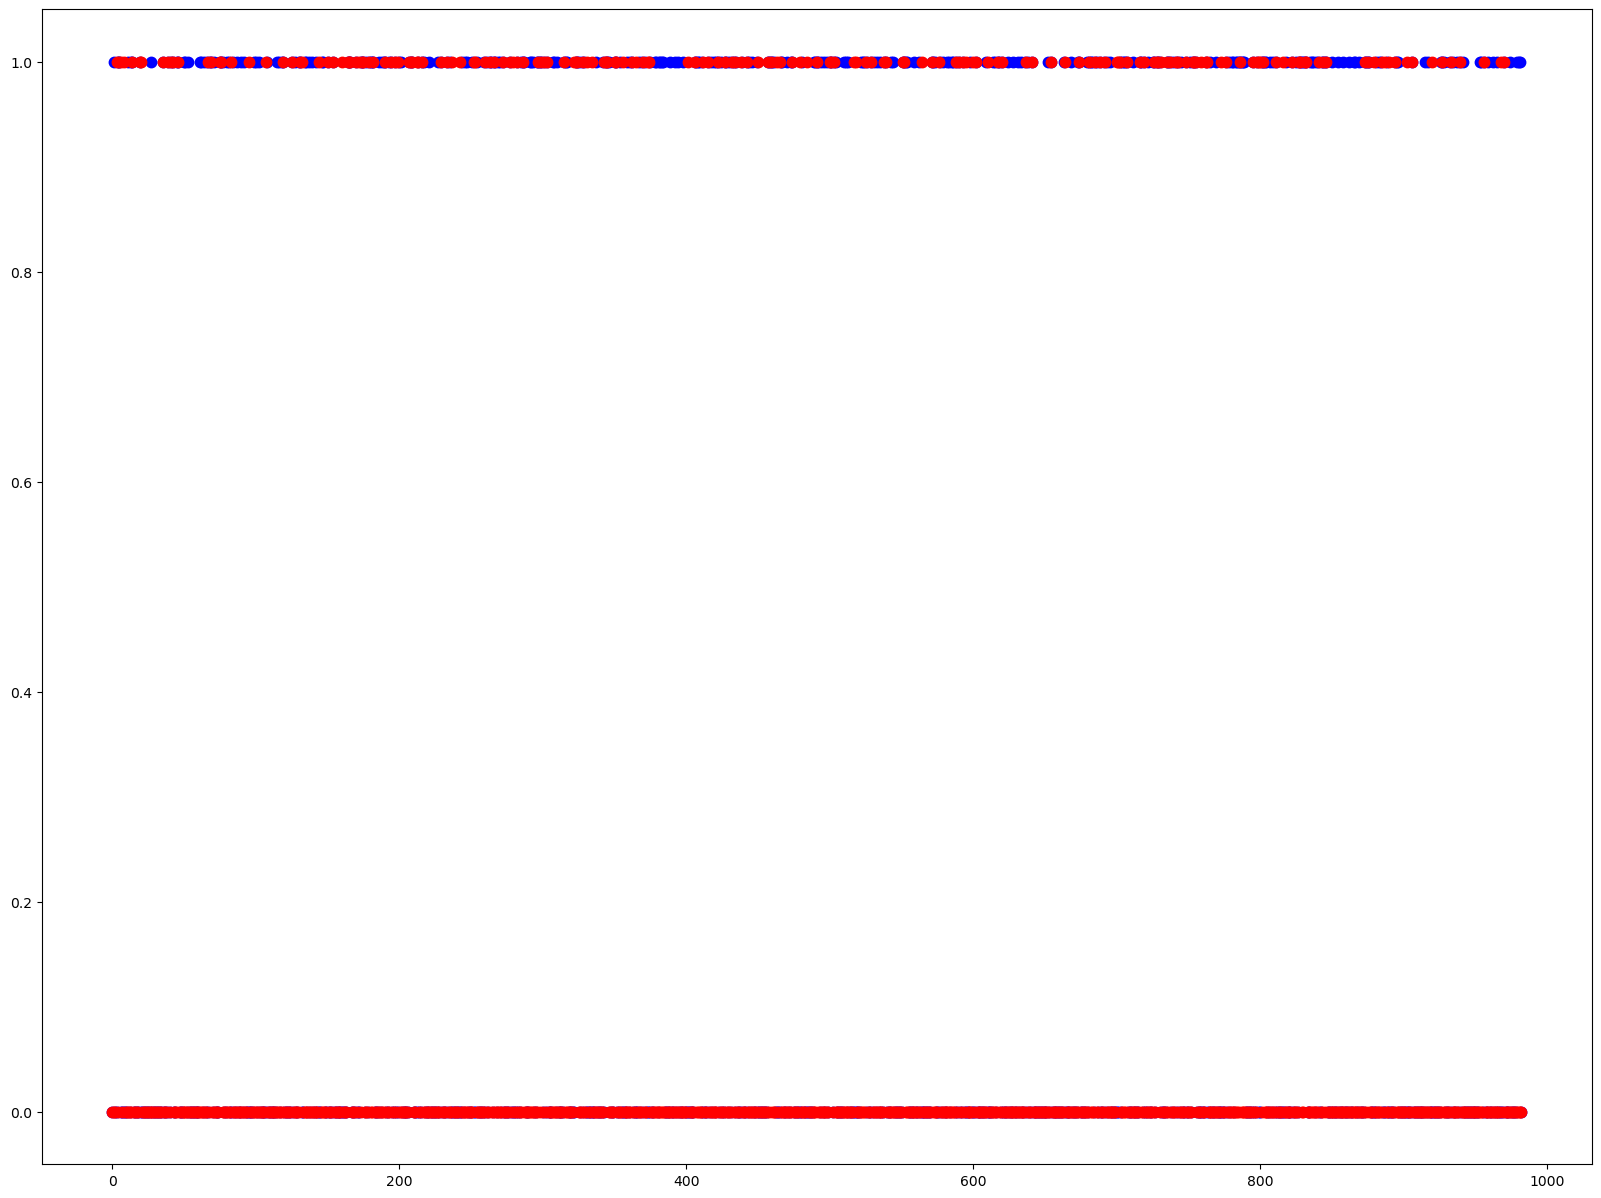

In [184]:
c = [i for i in range(0,983,1)]
plt.figure(figsize=(20,15))
plt.scatter(c,y_test,color="blue",  linewidth=2.5, linestyle="-")
plt.scatter(c,pred_rf,color="red",  linewidth=2.5, linestyle="-")


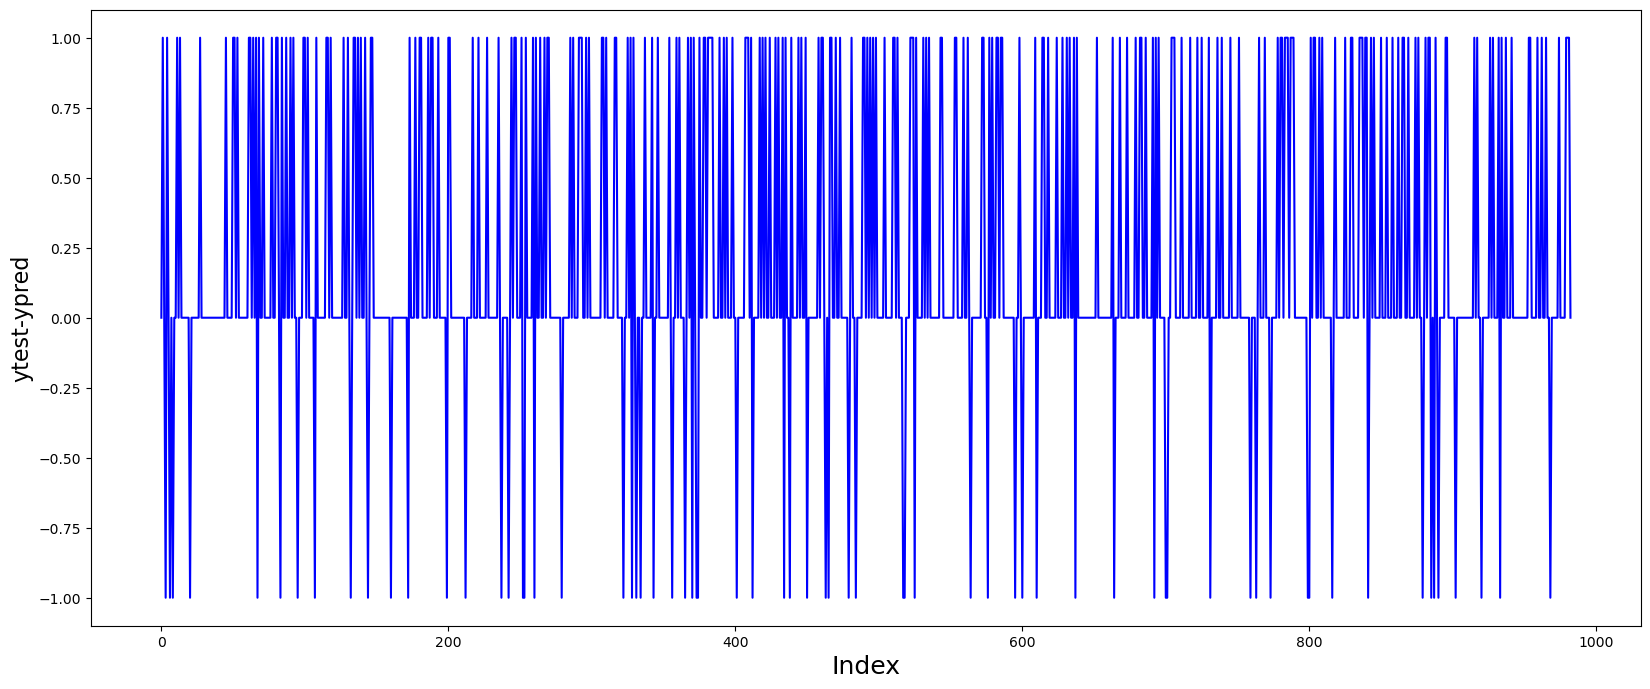

In [182]:
c = [i for i in range(0,983,1)]
plt.figure(figsize=(20,8))
plt.plot(c,np.array(y_test-pred_rf),color="blue")
plt.xlabel('Index', fontsize=18)       # X-label
plt.ylabel('ytest-ypred', fontsize=16) # Y-label
plt.show()